# **딥러닝 모델 구성 및 결과 검증**

- 런타임 --> 런타임 유형 변경

In [1]:
# mnist 숫자 이미지를 주고, 숫자 몇인지 맞추는 문제

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist # 데이터 받아오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print(len(x_train), len(y_train))
print(len(x_test), len(y_test))

60000 60000
10000 10000


In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
x_train[0].shape

(28, 28)

In [6]:
# 정규화(모델 트레이닝 하고, 정확도 높이기 위해 함)
# 0~1로 숫자 변경하기

x_train, x_test = x_train/255.0, x_test/255.0

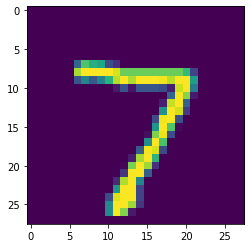

In [7]:
plt.imshow(x_test[0]) # 데이터를 숫자로 변환

In [8]:
y_test[0] # y_test 7이 나오는지 확인

7

In [9]:
# 모델 작성
model = tf.keras.models.Sequential([
    # input 데이터를 어떻게 받아줄지 정의 28*28 평평한 데이터 1줄짜리 데이터가 쫙 입력값으로 들어감
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # hidden layer 128개, relu 인풋값이 0보다 작으면 0을 그출력, 0보다 크면 그대로 숫자 출력
    tf.keras.layers.Dense(128, activation = 'relu'), 
    # 20% 정도는 연결하지말고 학습을 해라
    tf.keras.layers.Dropout(0,2),
    # 출력은 0~9까지 10개로 나누고, softmax는 카테고리 문제에 자주 사용
    tf.keras.layers.Dense(10, activation = 'softmax') 
    ])
# 학습을 어떻게 할지
# optimizer 최적화 옵션, 아담 자주 사용
model.compile(optimizer='adam',
              # loss 실제값과 예측값 차이를 어떤방식으로 둘지?
              loss='sparse_categorical_crossentropy',
              # 정확도가 어느정도 높아지는지
              metrics=['accuracy'])



In [10]:
# 모델 시각화
# 784 = 28*28
# 중간에 128 hidden layer
# 10개의 형태가 나와야함
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [11]:
# 모델 학습 및 평가
# gpu 병렬연산 필요
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5


TypeError: ignored

In [12]:
# 테스트 데이터를 넣어서 평가 출력
model.evaluate(x_test, y_test, verbose = 2) #verbose 0~2 출력형태(의미X)

313/313 - 3s - loss: 2.3689 - accuracy: 0.0564 - 3s/epoch - 9ms/step


[2.368929624557495, 0.05640000104904175]

### **CH05_08 머신러닝/딥러닝의 한계**

-머신러닝 이전의 인공지능
- 꼭짓점이 4개이다.
- 선분이 4개이다.

-머신러닝 / 딥러닝
- 많은 데이터와 시간이 필요하므로 필요성에 대해서 생각해볼 필요가 있음